In [953]:
import pandas as pd
import numpy as np
from imblearn.under_sampling import TomekLinks

In [954]:
df  = pd.read_csv('/Users/bianca/Documents/Itau-Analise-de-Credito/Inputs/credit_analysis_data.csv')

In [955]:
df.shape

(1000, 14)

In [956]:
df.head()

,Age,Income,Loan Amount,Loan Term,Credit Score,Number of Defaults,Education Level,Employment Status,Marital Status,Number of Dependents,Home Ownership,Years in Residence,Annual Expenses,Default Probability
0,56,25903,37269,47,761,3,PhD,Employed,Married,5,Rent,28,20629,1
1,69,53051,16003,54,312,0,Bachelor,Employed,Single,1,Mortgage,12,41678,0
2,46,38654,22246,48,683,3,Bachelor,Employed,Married,3,Own,7,20467,0
3,32,28666,29325,26,698,1,Bachelor,Employed,Married,1,Own,21,39952,0
4,60,40301,5816,39,318,2,PhD,Employed,Single,3,Own,20,29884,0


In [957]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   1000 non-null   int64 
 1   Income                1000 non-null   int64 
 2   Loan Amount           1000 non-null   int64 
 3   Loan Term             1000 non-null   int64 
 4   Credit Score          1000 non-null   int64 
 5   Number of Defaults    1000 non-null   int64 
 6   Education Level       1000 non-null   object
 7   Employment Status     1000 non-null   object
 8   Marital Status        1000 non-null   object
 9   Number of Dependents  1000 non-null   int64 
 10  Home Ownership        1000 non-null   object
 11  Years in Residence    1000 non-null   int64 
 12  Annual Expenses       1000 non-null   int64 
 13  Default Probability   1000 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 109.5+ KB


In [958]:
df.describe()

,Age,Income,Loan Amount,Loan Term,Credit Score,Number of Defaults,Number of Dependents,Years in Residence,Annual Expenses,Default Probability
count,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,43.81900,50863.121000,20203.059000,35.661000,578.81400,2.006000,2.548000,14.777000,30039.377000,0.197000
std,14.99103,14823.257362,9809.574573,13.686248,158.33446,1.418441,1.710152,8.606587,9864.135905,0.397931
min,18.00000,6556.000000,-10195.000000,12.000000,300.00000,0.000000,0.000000,0.000000,-2173.000000,0.000000
25%,31.00000,40822.250000,13585.000000,24.000000,443.00000,1.000000,1.000000,7.000000,22985.000000,0.000000
50%,44.00000,50807.000000,20038.000000,35.000000,582.00000,2.000000,3.000000,15.000000,30190.000000,0.000000
75%,56.00000,60281.750000,26842.000000,48.000000,722.00000,3.000000,4.000000,23.000000,36921.750000,0.000000
max,69.00000,89485.000000,51931.000000,59.000000,849.00000,4.000000,5.000000,29.000000,57345.000000,1.000000


In [959]:
#Verifica se há valores nulos
df.isnull().sum()

Age                     0
Income                  0
Loan Amount             0
Loan Term               0
Credit Score            0
Number of Defaults      0
Education Level         0
Employment Status       0
Marital Status          0
Number of Dependents    0
Home Ownership          0
Years in Residence      0
Annual Expenses         0
Default Probability     0
dtype: int64

In [960]:
#Verifica se há duplicados
df.duplicated().sum()

np.int64(0)

In [961]:
#Verifica quantos valores distintos há em cada coluna
df.nunique()

Age                      52
Income                  994
Loan Amount             987
Loan Term                48
Credit Score            458
Number of Defaults        5
Education Level           4
Employment Status         3
Marital Status            4
Number of Dependents      6
Home Ownership            3
Years in Residence       30
Annual Expenses         988
Default Probability       2
dtype: int64

In [962]:
# verifica o balanceamento das classes
#Conclusão: classe desbalanceada. 

df['Default Probability'].value_counts()

Default Probability
0    803
1    197
Name: count, dtype: int64

In [963]:
from sklearn.preprocessing import LabelEncoder

In [964]:
#Agrupando dados idade 
bins = [18, 28, 38, 48 , 58, 69 ]
labels = ['18-28', '29-38', '39-48', '49-58', '59-69']
df['Idade'] = pd.cut(df['Age'], bins=bins, labels=labels)


In [965]:
#Agrupando dados renda 
bins = [ 6556, 10000, 20000, 30000 , 40000, 50000,60000,70000,80000,90000 ]
labels = ['0-10 mil', '0-20 mil', '0-30 mil', '0-40 mil', '0-50 mil', '0-60 mil', '0-70 mil', '0-80 mil', '0-90 mil']
df['Renda'] = pd.cut(df['Income'], bins=bins, labels=labels)

In [966]:
#Agrupando dados valor do emprestimo 
bins = [-11000, 10000, 20000, 30000 , 40000, 50000,60000]
labels = ['0-10 mil', '0-20 mil', '0-30 mil', '0-40 mil', '0-50 mil', '0-60 mil']
df['valor_emprestimo'] = pd.cut(df['Loan Amount'], bins=bins, labels=labels)

In [967]:
#Agrupando dados prazo do emprestimo 
bins = [12, 24, 36, 48 , 60]
labels = ['12-24', '25-36', '37-48', '48-60']
df['prazo_pag'] = pd.cut(df['Loan Term'], bins=bins, labels=labels)

In [968]:
#Agrupando dados score 
bins = [0, 300, 600, 900 ]
labels = ['0-300', '300-600', '600-900']
df['pontos_credito'] = pd.cut(df['Credit Score'], bins=bins, labels=labels)

In [969]:
#Agrupando dados anos de residencia 
bins = [0, 5, 10, 15 , 20, 25, 30 ]
labels = ['0-5', '5-10', '10-15', '15-20', '20-25', '25-30']
df['anos_residencia'] = pd.cut(df['Years in Residence'], bins=bins, labels=labels)

In [970]:
#Agrupando dados anos de residencia 
bins = [-3000, 0, 10000, 20000 , 30000, 40000, 50000, 60000 ]
labels = ['neg-0', '0-10', '10-20', '20-30', '30-40', '40-50', '50-60']
df['gasto_anual'] = pd.cut(df['Annual Expenses'], bins=bins, labels=labels)

In [971]:
#Transformação de Variáveris categóricas em numérica
label_encoder = LabelEncoder()
df['Education Level'] = label_encoder.fit_transform(df['Education Level'])
df['Employment Status'] = label_encoder.fit_transform(df['Employment Status'])
df['Marital Status'] = label_encoder.fit_transform(df['Marital Status']) 
df['Home Ownership'] = label_encoder.fit_transform(df['Home Ownership']) 
df['Idade'] = label_encoder.fit_transform(df['Idade']) 
df['Renda'] = label_encoder.fit_transform(df['Renda'])
df['valor_emprestimo'] = label_encoder.fit_transform(df['valor_emprestimo'])
df['prazo_pag'] = label_encoder.fit_transform(df['prazo_pag'])
df['pontos_credito'] = label_encoder.fit_transform(df['pontos_credito'])
df['anos_residencia'] = label_encoder.fit_transform(df['anos_residencia'])
df['gasto_anual'] = label_encoder.fit_transform(df['gasto_anual'])


In [972]:
df.head()

,Age,Income,Loan Amount,Loan Term,Credit Score,Number of Defaults,Education Level,Employment Status,Marital Status,Number of Dependents,...,Years in Residence,Annual Expenses,Default Probability,Idade,Renda,valor_emprestimo,prazo_pag,pontos_credito,anos_residencia,gasto_anual
0,56,25903,37269,47,761,3,3,0,1,5,...,28,20629,1,3,2,3,2,2,4,2
1,69,53051,16003,54,312,0,0,0,2,1,...,12,41678,0,4,5,1,3,1,1,4
2,46,38654,22246,48,683,3,0,0,1,3,...,7,20467,0,2,3,2,2,2,5,2
3,32,28666,29325,26,698,1,0,0,1,1,...,21,39952,0,1,2,2,1,2,3,3
4,60,40301,5816,39,318,2,3,0,2,3,...,20,29884,0,4,4,0,2,1,2,2


## Analise Exploratoria

In [973]:
import seaborn as sns
import matplotlib.pyplot as plt

In [974]:
correlations = df.corr()['Default Probability'].drop('Default Probability')  # Remove a correlação da target consigo mesma

# Criar um DataFrame com as correlações e ordenar em ordem crescente
correlation_df = pd.DataFrame(correlations)
correlation_df.columns = ['correlation']
correlation_df = correlation_df.sort_values(by='correlation', ascending=True)

In [975]:
print(correlation_df)

                      correlation
Renda                   -0.039148
Education Level         -0.036325
Marital Status          -0.034027
Income                  -0.031895
Employment Status       -0.025362
pontos_credito          -0.022940
Credit Score            -0.019436
Years in Residence      -0.019018
Number of Defaults      -0.014510
prazo_pag               -0.008739
Loan Amount             -0.006517
Number of Dependents    -0.005819
valor_emprestimo        -0.005100
Loan Term                0.000879
Annual Expenses          0.005122
Idade                    0.012270
gasto_anual              0.014522
Age                      0.023267
anos_residencia          0.023757
Home Ownership           0.062716


C:\Users\bianca\AppData\Local\Temp\ipykernel_83176\1723054668.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation_df['correlation'], y=correlation_df.index, palette='coolwarm')


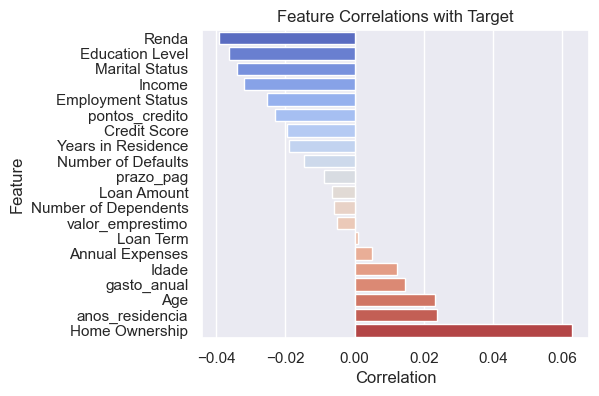

In [976]:
plt.figure(figsize=(5, 4))
sns.barplot(x=correlation_df['correlation'], y=correlation_df.index, palette='coolwarm')
plt.title('Feature Correlations with Target')
plt.xlabel('Correlation')
plt.ylabel('Feature')
plt.show()

In [977]:
sns.set(font_scale=1.3)
sns.set(rc={'figure.figsize': (20, 20)})

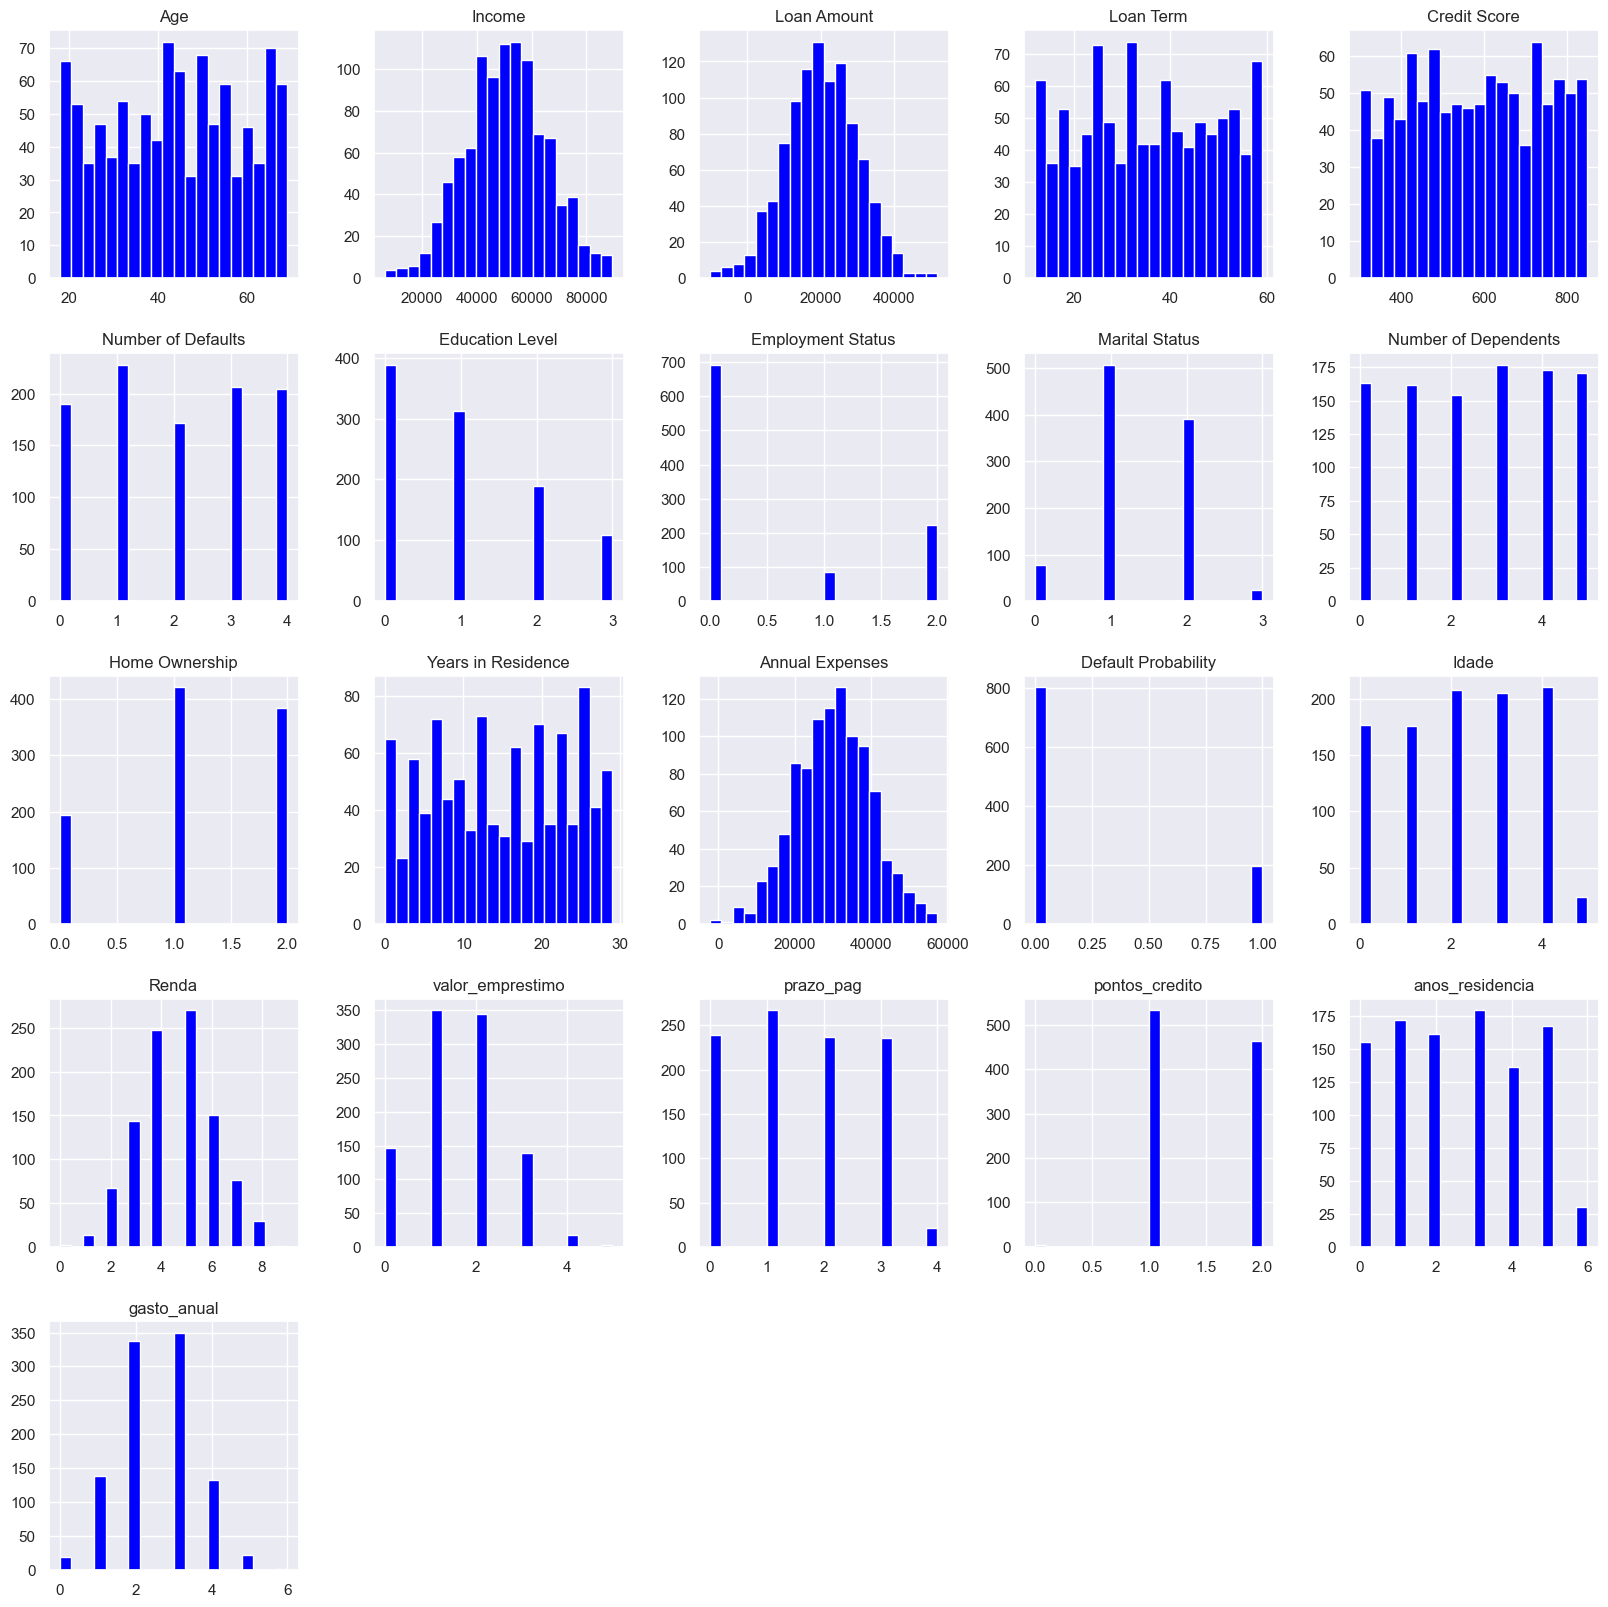

In [978]:
eixo = df.hist(bins=20, color='blue')
plt.show()

## Separação classe e atributos

In [1251]:
# Seleção de features
col_relevancia = [    'Home Ownership', 'Education Level', 'Marital Status','Income']
relevancia_col = df[col_relevancia]

In [1252]:
#X = df.iloc[:, 0:12].values
X = relevancia_col.iloc[:, 0:6].values
X.shape

(1000, 4)

In [1317]:
y = df.iloc[:, 13].values
#y = df_encoded.iloc[:, 19].values
y.shape

(1000,)

## Baleanceamento das classes

In [1318]:
# Método de undersampling - Tomek links
tl = TomekLinks(sampling_strategy = 'auto')
X_tl, y_tl = tl.fit_resample(X,y)

In [1319]:
np.unique(y_tl, return_counts=True)

(array([0, 1]), array([710, 197]))

In [1320]:
# Método de oversampling - SMOTE
from imblearn.over_sampling import SMOTE

In [1321]:

smote = SMOTE(sampling_strategy='minority')
X_smote, y_smote = smote.fit_resample(X_tl, y_tl)

In [1322]:
np.unique(y_smote, return_counts=True)

(array([0, 1]), array([710, 710]))

## TREINAMENTO DO MODELO 

Sem Balanceamento

In [1323]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [1324]:
# Dividindo bases de treino e teste
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size= 0.2)

In [1325]:
x_train.shape, x_test.shape

((800, 4), (200, 4))

In [1326]:
# Treinando modelo com dados desbalanceados
regressao_logistica = LogisticRegression()
regressao_logistica.fit(x_train, y_train)


C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

VER SE PRECISA FAZER NORMALIZAÇÃO DOS DADOS
ENTENDER O QUE É StandardScaler

In [1327]:
# Aplicando previsões aos dados de teste
y_pred = regressao_logistica.predict(x_test)


In [1328]:
# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Acurácia:", accuracy)
print("Matriz de Confusão:\n", conf_matrix)
print("Relatório de Classificação:\n", class_report)


Acurácia: 0.815
Matriz de Confusão:
 [[163   0]
 [ 37   0]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90       163
           1       0.00      0.00      0.00        37

    accuracy                           0.81       200
   macro avg       0.41      0.50      0.45       200
weighted avg       0.66      0.81      0.73       200



C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

## TREINAMENTO DO MODELO TOMEK LINK

In [1329]:
# Dividindo bases de treino e teste
x_train, x_test, y_train, y_test = train_test_split(X_tl,y_tl, test_size= 0.2)

In [1330]:
# Treinando modelo com dados desbalanceados
regressao_logistica = LogisticRegression()
regressao_logistica.fit(x_train, y_train)

C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [1331]:
y_pred_tl = regressao_logistica.predict(x_test)

In [1332]:
# Avaliando o desempenho do modelo
accuracy = accuracy_score(y_test, y_pred_tl)
conf_matrix = confusion_matrix(y_test, y_pred_tl)
class_report = classification_report(y_test, y_pred_tl)

print("Acurácia:", accuracy)
print("Matriz de Confusão:\n", conf_matrix)
print("Relatório de Classificação:\n", class_report)

Acurácia: 0.7747252747252747
Matriz de Confusão:
 [[141   0]
 [ 41   0]]
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.77      1.00      0.87       141
           1       0.00      0.00      0.00        41

    accuracy                           0.77       182
   macro avg       0.39      0.50      0.44       182
weighted avg       0.60      0.77      0.68       182



C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\bianca\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classific

## TREINAMENTO SMOTE

In [1333]:
# Dividindo bases de treino e teste
seed = 1
x_train, x_test, y_train, y_test = train_test_split(X_smote,y_smote, test_size= 0.3, random_state=seed)

In [1334]:
# Treinando modelo com dados desbalanceados
regressao_logistica = LogisticRegression(max_iter = 1000)
regressao_logistica.fit(x_train, y_train)

LogisticRegression(max_iter=1000)

In [1335]:
y_pred_smote = regressao_logistica.predict(x_test)

In [1341]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [1343]:


# Supondo que você já tenha o conjunto de previsões y_pred e as verdadeiras labels y_test

# Acurácia
accuracy = accuracy_score(y_test, y_pred)

# Precisão
precision = precision_score(y_test, y_pred)

# Recall
recall = recall_score(y_test, y_pred)

# F1-Score
f1 = f1_score(y_test, y_pred)

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# AUC-ROC
auc = roc_auc_score(y_test, regressao_logistica.predict_proba(x_test)[:, 1])






ValueError: Found input variables with inconsistent numbers of samples: [426, 200]

In [ ]:
# Imprimindo as métricas
print(f"Acurácia: {accuracy}")
print(f"Precisão: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print(f"Matriz de Confusão:\n{conf_matrix}")
print(f"AUC-ROC: {auc}")

In [ ]:
# Plotando a curva ROC
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled)[:, 1])
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label='Curva ROC (área = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
coefficients = pd.Series(regressao_logistica.coef_[0], index=column_names)

## Tuning de Hiperparâmetros

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
grid_search = GridSearchCV(regressao_logistica, param_grid, cv=5, scoring='accuracy')

NameError: name 'param_grid' is not defined